In [ ]:
import gym
import w_mac
import numpy as np
from gym.spaces import Tuple, Discrete, Box, MultiDiscrete, MultiBinary
from collections import defaultdict
import networkx as nx
import random
from w_mac.envs.packet import Packet

In [ ]:
# data = [(0,2),(0,1),(1,2),(2,3),(2,4),(3,4)]
#data = [(0,1),(0,8),(0,7),(0,12),(0,2),(1,2),(1,12),(1,5),(1,6),(1,14),(1,7),(1,8),(5,6),(5,14),(6,14),(8,7),(12,2),(2,3),(2,4),(4,13),(4,9),(4,11),(4,10),(10,11),(9,13),(3,4),(9,10),(9,11),(5,15)]
d = defaultdict(list)
data = [(0,2),(0,1),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4),(5,2),(5,3),(5,4)]
# defaultdict(<type 'list'>, {})
for node, dest in data:
    d[node].append(dest)
print(d)

G = nx.Graph()
for k,v in d.items():
    for vv in v:
        G.add_edge(k,vv)
nx.draw(G)

In [ ]:
G.has_edge(0,5)

In [ ]:
env = gym.make('wmac-graph-v0',graph=G)
env.reset()

In [ ]:
actions= env.action_space.sample()
actions

In [ ]:
nxt_state, reward, done, _ = env.step(actions)
print(nxt_state, reward, done, _ )

In [ ]:
env.action_space.nvec[0]

In [ ]:
actions = [1,0,1,0,1]
collision_domain  = {0:[0,1,2],1:[2,3,4]}

p1_src = 0
p4_src = 4 

p1_nh = 2
p4_nh = 2 

for id, action in enumerate(actions):
      for key,values in collision_domain.items():
        if(id in values):
            action_sublist = [actions[i] for i in values]
            #print("a_sublist", action_sublist)
            if(action_sublist.count(1) > 1):
                print("collision")
                break
            else:
                print("sucess")
                break
    

In [ ]:
wait_counter = [4,2,3,1,0]
actions = [0,1,0,1,0]
reward = 0
for id,count_val in enumerate(wait_counter):
    print(id, count_val)
    if count_val < 4 and actions[id] != 1 :
        print("id",id)
        reward -= 500
print(reward)        

In [ ]:
from gym.spaces import Box


B = Box(low=0.0, high=1.0, shape=(2, 3), dtype=np.float32)
B.sample()

In [ ]:
c =  MultiDiscrete([ (5,5,5,5,5), (2,2,2,2,2) ])
c.sample()

In [ ]:
t = Tuple((Discrete(6),Discrete(6),Box(0, 1, shape=(1, 5))))
t.sample()

In [ ]:
#e = Tuple((MultiDiscrete([ (5,5,5,5,5), (2,2,2,2,2) ]),Box(0, 1, shape=(1, 5))))
#e.sample()

In [ ]:
num_nodes = 5
tup1 = tuple((num_nodes,)*num_nodes)
tup2 = tuple((2,)*num_nodes)
l1 = []
l1.append(tup1)
l1.append(tup2)
l1

In [ ]:
m1 = MultiDiscrete(l1)
m1.sample()

In [1]:
queues = {i: [] for i in env.graph.nodes(data=False)}
print(queues)

for i in env.graph.nodes(data=False):
    #Assumption : same destination for all the queued packets in the node
    src = i
    dest = random.randrange(1,5)
    while (False == (env.graph.has_edge(src,dest))):
        dest = random.randrange(1,5)
    print(src,dest)

    for count in range(2):
        # create packet and register process
        packet = Packet(src,dest,dest) #for now consider single hop. Hence dest = nxt_hop
        queues[src].insert(0, packet)

# Print the number of elements in queue.
#print(len(queues[1]))

n3_queue = queues[3]
n3_first_packet = n3_queue[len(n3_queue)-1]
print('n3_nxt_hop', n3_first_packet.nxt_hop)

#Frame the state - Next hop of all first packets in queue.

state = [] #empty list for state

for node in queues.values():
    if len(node):
        print(node[len(node)-1].id)
        state.append(node[len(node)-1].nxt_hop)
    #for packet in node:
    while (len(node)):
        packet = node.pop()
        print('id :',packet.id)
        print('src :',packet.src)
        print('dest :',packet.dest)
        print('nxt_hop :',packet.nxt_hop)
        print('------------------------')
    
    print(state)


NameError: name 'env' is not defined

defaultdict(<class 'list'>, {0: [2, 1, 3], 1: [2, 3], 2: [3, 4], 3: [4], 5: [2, 3, 4]})


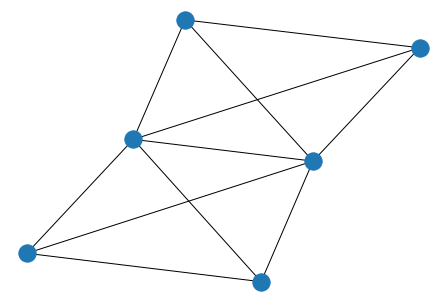

In [53]:
import gym
import w_mac
from collections import defaultdict
import matplotlib as plt
import networkx as nx

# data = [(0,2),(0,1),(1,2),(2,3),(2,4),(3,4)]
#data = [(0,1),(0,2),(0,3),(1,2),(1,3),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5),(4,10),(5,6),(6,7),(6,8),(7,8),(8,9),(9,10)]
d = defaultdict(list)
data = [(0,2),(0,1),(0,3),(1,2),(1,3),(2,3),(2,4),(3,4),(5,2),(5,3),(5,4)]
# defaultdict(<type 'list'>, {})
for node, dest in data:
    d[node].append(dest)
print(d)

G = nx.Graph()
for k,v in d.items():
    for vv in v:
        G.add_edge(k,vv)
nx.draw(G)

In [54]:
collision_domain = {}

dict_index = 0
for i in G.nodes:
    domain_list1 = []
    domain_list2 = []
    for j in G.nodes:
        if(G.has_edge(i,j) == True):
            if i not in domain_list1:
                domain_list1.append(i)
                
            connected = True
            for node in domain_list1:
                if(G.has_edge(node,j) == False):
                    connected = False
            if connected == True:
                if j not in domain_list1:
                    domain_list1.append(j)
            else:
                for index,values in collision_domain.items():
                    connected = True
                    for node in values:
                        if(G.has_edge(node,j) == False):
                            connected = False
                    if connected == True:
                        if j not in values:
                            collision_domain[index].append(j)
                    else:
                        domain_list2 = [i,j]
                
                    
    #print("domain_list1",domain_list1)
    #print("domain_list2",domain_list2)
    if len(domain_list1):
        dict_index += 1
        collision_domain[dict_index] = domain_list1
    
    if len(domain_list2):
        dict_index += 1
        collision_domain[dict_index] = domain_list2
        
    print("collision_domain",collision_domain)            
 

collision_domain {1: [0, 2, 1, 3]}
collision_domain {1: [0, 2, 1, 3], 2: [2, 0, 1, 3], 3: [2, 5]}
collision_domain {1: [0, 2, 1, 3], 2: [2, 0, 1, 3], 3: [2, 5], 4: [1, 0, 2, 3]}
collision_domain {1: [0, 2, 1, 3], 2: [2, 0, 1, 3], 3: [2, 5, 4], 4: [1, 0, 2, 3], 5: [3, 0, 2, 1], 6: [3, 5]}
collision_domain {1: [0, 2, 1, 3], 2: [2, 0, 1, 3], 3: [2, 5, 4], 4: [1, 0, 2, 3], 5: [3, 0, 2, 1], 6: [3, 5], 7: [4, 2, 3, 5]}
collision_domain {1: [0, 2, 1, 3], 2: [2, 0, 1, 3], 3: [2, 5, 4], 4: [1, 0, 2, 3], 5: [3, 0, 2, 1], 6: [3, 5], 7: [4, 2, 3, 5], 8: [5, 2, 3, 4]}


In [55]:
fullrange_wo_dupli = {}
sorted_list = []
for key,value in collision_domain.items():
    sorted_list = sorted(value) ## to arrange values in ascending order in dict and removes duplicate values of the single key
    # print('With dupli',sorted_list)
    fullrange_wo_dupli[key] = sorted_list
print('fullrange_wo_dupli' ,fullrange_wo_dupli)

fullrange_wo_dupli {1: [0, 1, 2, 3], 2: [0, 1, 2, 3], 3: [2, 4, 5], 4: [0, 1, 2, 3], 5: [0, 1, 2, 3], 6: [3, 5], 7: [2, 3, 4, 5], 8: [2, 3, 4, 5]}


In [56]:
d2 = {tuple(v): k for k, v in fullrange_wo_dupli.items()}  # exchange keys, values
fullrange_wo_dupli = {v: list(k) for k, v in d2.items()}
print('fullrange_wo_dupli' ,fullrange_wo_dupli)

fullrange_wo_dupli {5: [0, 1, 2, 3], 3: [2, 4, 5], 6: [3, 5], 8: [2, 3, 4, 5]}


In [57]:
to_remove_index = []
for index, values in fullrange_wo_dupli.items():
    #print(index, values)
    is_subset = False
    for test_values in fullrange_wo_dupli.values():
        #print("test_values",test_values)
        if values != test_values:
            if(set(values).issubset(set(test_values))):
                is_subset = True
                print("subset_values",values)
                break
    if is_subset:
        to_remove_index.append(index)

print("to_remove_index", to_remove_index)

subset_values [2, 4, 5]
subset_values [3, 5]
to_remove_index [3, 6]


In [58]:
for key in to_remove_index:
    fullrange_wo_dupli.pop(key,None)

print('fullrange_wo_dupli' ,fullrange_wo_dupli)

fullrange_wo_dupli {5: [0, 1, 2, 3], 8: [2, 3, 4, 5]}
